# Figure 5 — Directed evolution of AraC-LOV variants using Retron-Assisted, Multiplexed, Phage Gene Evolution (RAMPhaGE) and POGO-PANCE.

Unless explicitly noted otherwise (e.g. indicated as being from Zenodo), all data used for the visualisations was generated using the Illumina or Nanopore pipeline.

Please make sure to download the input datasets `Illumina` from the Zenodo repository and place it in a folder named `data` at root repository level.

For more information, please refer to the `README.md`.

---

### Figure Summary

<div style="text-indent:-2em; padding-left:2em"><strong>(A)</strong> Overview of the retron
recombineering system. </div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(B)</strong> Sanger sequencing chromatograms of phage pools </div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(C)</strong> Schematic of RAMPhaGE editing
library construction.</div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(D)</strong> Editing outcomes showing the percentage of edited versus WT phages from
retron libraries targeting either the LOV2 domain (DMS Library), the SG and GS linker regions
(Linker Library), or both.</div>
<div style="text-indent:-2em; padding-left:2em"><strong>(E)</strong> Comparison of amino acid-level mutation coverage following a
single passage using either the plLacO1-DP6 mutagenesis system or the retron-encoded DMS
library. </div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(F)</strong> Amino acid-level mutation rates per position after a single
phage passage on the DMS library carrying hosts.</div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(G)</strong> Enrichment analysis from a POGO-PANCE/RAMPhaGE evolution campaign using R2-LOV as
input. </div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(H)</strong> Scatter plot comparing
variants frequencies</div>
<div style="text-indent:-2em; padding-left:2em"><strong>(I)</strong>  AlphaFold3-predicted structure of
WT AraC-LOV2 and comparison to that of R2-LOV2 </div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(J)</strong>  Functional validation of enriched R2-LOV linker variants using the RFP
reporter assay.</div>  

---


## Notebook Setup
----------------------------

Run the following cell to import all required libraries, define plotting settings, and configure the environment for data analysis and visualization.

In [1]:
# --- Import necessary modules ---
import os
import sys
import json
import pickle as pkl
from importlib import reload
from pathlib import Path

notebook_dir = Path().resolve()
repo_root = notebook_dir.parent
sys.path.append(str(repo_root))

import numpy as np
import pandas as pd
from scipy import stats
import scipy
from Bio import SeqIO
from Bio.SeqIO import QualityIO
from scripts.utils import dna_rev_comp, translate_dna2aa
from scripts.preprocessing_functions import *
from scripts.plotting import *
from scripts.Illumina_functions import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties

# ======================== PLOTTING SETTINGS ========================

# --- Custom color map for mutation visualization ---
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", [
    "#22577A",  # Deep blue
    "#38A3A5",  # Teal
    "#57CC99",  # Medium green
    "#80ED99",  # Bright green
    "#C7F9CC"   # Light pastel green
], N=256)

# --- Seaborn theme configuration ---
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.linewidth": 1
}
sns.set_theme(context="paper", style='ticks', palette="Greys_r", rc=custom_params)

# --- General matplotlib settings ---
fs = 8  # font size
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams.update({
    'font.family': 'Avenir Next',
    'font.weight': 'demi', 
    'font.size': fs,
    'text.color': '#231F20',
    'axes.labelcolor': '#231F20',
    'xtick.color': '#231F20',
    'ytick.color': '#231F20',
    'axes.edgecolor': '#231F20',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'pdf.fonttype': 42,
    'text.usetex': False
})
sns.set_context("paper", rc={
    "font.size": fs,
    "axes.titlesize": fs + 1,
    "axes.labelsize": fs,
    "axes.linewidth": 1,
    "xtick.labelsize": fs,
    "ytick.labelsize": fs,
    "legend.fontsize": fs,
    "legend.title_fontsize": fs + 1
})

avenir_fp = FontProperties(family='Avenir Next', weight='demi', size=fs)

# ======================== LAYOUT PARAMETERS ========================

# --- Pre-defined figure dimensions for multi-panel plots ---
hi = 10.5 * 0.75
wi3 = 2.24
wi2 = 4.76
wi1 = 7.24
nr = 5

# --- Utility for shortening sample names ---
short_fn = np.vectorize(lambda x: x[:5])

## Figure 5A: Overview of the retron recombineering system.
----------------------------

Infection with a selection phage (SP) and addition of (aTc) induce gIII
expression, while IPTG activates a recombitron operon encoding CspRecT, MutL E32K, and
Eco1 reverse transcriptase (RT). Expressed retrons are reverse-transcribed into ssDNA donors
containing a central predefined edit flanked by homology arms, enabling targeted editing of the
SP genome during replication. Non-targeting relates to a control retron with no homology to the
phage-encoded transgene. Figure created in Adobe Illustrator.

![Alt Text](figure_illustrations/Figure_5A.png)

## Figure 5B: Sanger sequencing chromatograms of phage pools
----------------------------
Sanger sequencing chromatograms of phage pools analyzed after
overnight editing with 90bp retrons under the indicated conditions. The G to T edit position is
indicated with dashed lines. Expanded data in Fig. S9. 

Chromatograms were generated from `.ab1` sequencing files using the Python script `scripts/impose_enrichment_on_pymol.py`, which overlays base signal intensities across aligned reads. Final figure layout and annotations were created in Adobe Illustrator.

![Alt Text](figure_illustrations/Figure_5B.png)

## Figure 5C:Schematic of RAMPhaGE editing library construction.
----------------------------

Barcoded retron edit oligo pools were subcloned into a recombineering
plasmid, and transformed into SP-infectable E. coli to enable pooled editing. Additional details
in Fig. S10. Figure created with Adobe Illustrator.

![Alt Text](figure_illustrations/Figure_5C.png)

## Figure 5D: Editing outcomes

----------------------------
Editing outcomes showing the percentage of edited versus WT phages from
retron libraries targeting either the LOV2 domain (DMS Library), the SG and GS linker regions
(Linker Library), or both.

In [2]:
def get_mismatch_info_from_matching_title(entry, title):
    try:
        for hit in entry["report"]["results"]["search"]["hits"]:
            for desc in hit.get("description", []):
                if desc.get("title", "").strip() == title:
                    hsp = hit["hsps"][0]  # use top HSP for the matching hit
                    identity = hsp["identity"]
                    align_len = hsp["align_len"]
                    gaps = hsp.get("gaps", 0)
                    mismatches = align_len - identity
                    return mismatches, align_len
    except (KeyError, IndexError):
        pass
    return 0, 0

def extract_all_titles(entries):
    titles = []
    for entry in entries:
        try:
            for hit in entry["report"]["results"]["search"]["hits"]:
                for desc in hit.get("description", []):
                    titles.append((desc.get("title", "").strip(), entry))
        except (KeyError, IndexError):
            continue
    return titles
def generate_piechart(exp, variant, bc):
    reference_len = 246 
    blast_dir = Path(f'{repo_root}/data/Illumina/{exp}/blast/alignments/{bc}')
    r1_path = blast_dir / f"{variant}_{bc}_S1_Nt_filt_R1.out"
    r2_path = blast_dir / f"{variant}_{bc}_S1_Nt_filt_R2.out"

    with open(r1_path) as f1, open(r2_path) as f2:
        r1_json = json.load(f1)
        r2_json = json.load(f2)

    r1_entries = r1_json["BlastOutput2"]
    r2_entries = r2_json["BlastOutput2"]

    # Extract (title, entry) pairs
    r1_titles = extract_all_titles(r1_entries)
    r2_titles = extract_all_titles(r2_entries)

    # Convert to dicts for quick lookup (yes, a temp map still helps)
    r1_dict = {title: entry for title, entry in r1_titles}
    r2_dict = {title: entry for title, entry in r2_titles}

    shared_ids = set(r1_dict.keys()) & set(r2_dict.keys())
    print(f"Found {len(shared_ids)} shared read IDs")

    total_mismatches = 0
    total_aligned = 0
    mutated_read_count = 0

    for title in shared_ids:
        mismatches_r1, align_len_r1 = get_mismatch_info_from_matching_title(r1_dict[title], title)
        mismatches_r2, align_len_r2 = get_mismatch_info_from_matching_title(r2_dict[title], title)

        combined_align_len = align_len_r1 + align_len_r2
        if combined_align_len < 0.8 * reference_len:
            continue  # skip this read if it's too short

        total_mismatches += mismatches_r1 + mismatches_r2
        total_aligned += combined_align_len

        if (mismatches_r1 + mismatches_r2) > 0:
            mutated_read_count += 1
    
    total_reads = len(shared_ids)
    mutation_frequency = round((mutated_read_count / total_reads if total_reads else 0) * 100,1)
    wildtype_percent = 100 - mutation_frequency

    fig, ax = plt.subplots(figsize=(6, 6))
    wedges, _ = ax.pie(
        [wildtype_percent, mutation_frequency],
        colors=["white", "#69b3a2"],
        startangle=90,
        wedgeprops=dict(edgecolor='black', linewidth=4)
    )
    ax.text(-0.7, 0.1, f"WT\n{round(wildtype_percent, 1)}%", 
            ha='center', va='center', fontsize=20, weight='bold')
    ax.text(0.5, 0.3, f"Mutated\n{round(mutation_frequency, 1)}%", 
            ha='center', va='center', fontsize=20, weight='bold')
    plt.title("Total Reads: WT vs Mutated", fontsize=20)
    plt.tight_layout()
    # plt.savefig(f'{repo_root}/final_output/{variant}/combined/plots/AA/{variant}_mutation_rate_pie_chart.pdf', bbox_inches='tight')
    plt.show()
    

In [ ]:
# === Compare total reads: retron libraries targeting the AsLOV2 domain (DMS) ===
generate_piechart('AraC-LOV_RAMPhaGE_Multi-library_NGS','R35', 'BC1')

Found 27215 shared read IDs


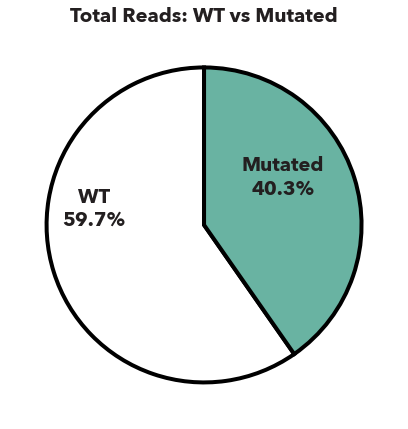

In [7]:
# === Compare total reads: retron libraries targeting the linker region (linker library) ===
generate_piechart('AraC-R2-LOV_POGO_RAMPhaGE_NGS','R36', 'BC1')

Found 28281 shared read IDs


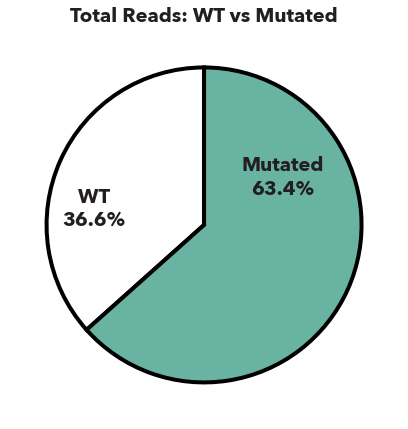

In [8]:
# === Compare total reads: retron libraries targeting both the AsLOV2 domain and the linker regions ===
generate_piechart('AraC-LOV_RAMPhaGE_Multi-library_NGS', 'R35', 'BC2')

## Figure 5E: Comparison of amino acid-level mutation coverage following a single passage using either the plLacO1-DP6 mutagenesis system or the retron-encoded DMS library. 
----------------------------

In both cases, only the LOV2 region of the reference sequence was analyzed. The y-axis
indicates the number of times each amino acid occurs in the LOV2 reference. An extended
comparison is shown in Fig. S11. 

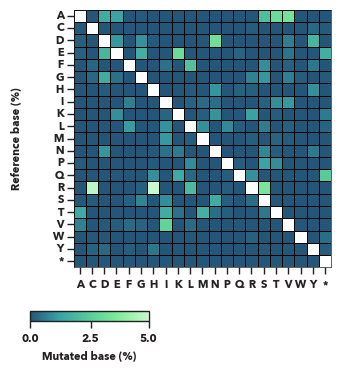

In [2]:
# ======================== PLOT ENRICHMENT AND MUTATIONAL SPECTRUM DATA ========================

amplicon_AraCLOV2 = 'CGCCGCATGGAAGCGATTAACGAAAGCAGCGGTTTAGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGACCCGCGCCTTCCCGACAATCCAATTATTTTTGCGTCCGATAGCTTCCTGCAATTAACCGAATACAGCCGCGAAGAAATTCTGGGTCGTAATTGTCGCTTCCTTCAGGGGCCAGAGACTGACCGTGCTACGGTACGCAAAATCCGCGACGCAATCGACAATCAAACGGAAGTCACGGTTCAGTTGATTAACTATACGAAGAGCGGAAAAAAATTCTGGAATTTATTTCACTTGCAGCCTATGCGTGACCAGAAGGGCGATGTCCAGTATTTCATTGGCGTTCAGCTTGATGGTACCGAGCATGTTCGCGATGCTGCGGAGCGTGAAGGTGTAATGTTAATTAAAAAGACTGCTGAAAACATTGATGAGGCGGCCAAAGGGAGCCTGCATCCGCCGATGGATAACCGCGTG'
# --- Sequence region of interest ---
start_LOV2  = "ttagccacaa".upper() 
end_LOV2 = "cggccaaa".upper() 

LOV2_gene = amplicon_AraCLOV2[amplicon_AraCLOV2.index(start_LOV2):amplicon_AraCLOV2.index(end_LOV2)+len(end_LOV2)]

# --- Define variant name and data type ---
variant = "DP6" 
dat = "AA"
variant_name = "LOV_DP6_Library_Mutagenesis_10-8" 

# --- Set paths to input and output folders ---
Folder = f"{repo_root}/final_output/Illumina/DP6_Mutagenesis_10-3/enrichments/{dat}" 

# --- Load amino acid-level mutational spectrum (percentage values) ---
mut_spectrum_AA_perc = pd.read_csv(f"{Folder}/{variant}_BC1_S1_combined_roiTrue_{dat}_mut_spec.csv", index_col = 0)
# --- Load enrichment matrix (relative mutation enrichment scores) ---
enrichment = pd.read_csv(f"{Folder}/{variant}_BC1_S1_combined_roiTrue_{dat}_enrichment_relative.csv", index_col = 0)
# --- Define folder to store output plots ---
FigFolder = Folder+ f"/plots/{dat}/"

# --- Identify positions (columns) in enrichment matrix that are entirely NaN ---
empty_cols = enrichment.columns[enrichment.isna().all()]

# --- Replace all NaN values in the enrichment matrix with 0 (required for calculations) ---
enrichment.fillna(0, inplace=True)
# --- Set reference sequence based on data type (AA or DNA) ---
ref = translate_dna2aa(LOV2_gene) if dat != "DNA" else LOV2_gene

# --- Calculate amino acid-level mutational spectrum from enrichment data ---
#     Returns both absolute counts and percentage distribution of mutations
mut_spectrum_AA,mut_spectrum_AA_perc = calc_mut_spectrum_from_enrichment(enrichment, ref_seq=ref, data_type=dat)

# --- Plot mutational spectrum as a heatmap (AA × AA, percentage-based) ---
plot_mutation_spectrum(mut_spectrum_AA_perc, data_type=dat, colormap=custom_cmap, ticks = [0.0, 2.5, 4.9])

In [ ]:
# ======================== ANALYSIS PARAMETERS ========================

# --- Path to input FASTQ files and config ---
homedir =  f"{repo_root}/data/Illumina/LOV_Linker_Library_Mutagenesis_10-8" 

Bc = "BC1" # Barcode to be analyzed (must match one used during demultiplexing)
read_dirs = ["R1", "R2"] # Read directions to include in the analysis
Section = "S1" # Section/amplicon to be analyzed
data_type = "AA" # Mutation type: "AA" = amino acids, "Nt" = nucleotides

# --- Sequence region of interest ---
LOV_startseq = "ttagccacaa".upper()
LOV_endseq = "cggccaaa".upper()

# --- Load variant information from config ---
with open(f"{homedir}/config.json") as f:
  config = json.load(f)

variant = config["variant"]

# ====================== LOAD AND FILTER BLAST ALIGNMENTS ======================

# --- Container to store parsed alignment and coverage data for each read direction ---
all_alignments = {}
all_coverages = {}


# --- Loop through both read directions: R1 and R2 ---
for read_dir in read_dirs:

    # --- Load BLAST output JSON file ---
    print("################",  read_dir,   "################")
    with open(f"{homedir}/blast/alignments/{variant}_{Bc}_{Section}_Nt_filt_{read_dir}.out", "r") as file:
        blast_output = json.load(file)

    # --- Load the reference DNA sequence ---
    amplicon_seq = str(SeqIO.read(f"{homedir}/references/{variant}_{Bc}_{Section}_Nt_filt_ref.fasta", "fasta").seq)

    # --- Extract BLAST hits from the loaded JSON ---
    blast_alignments = blast_output["BlastOutput2"][0]["report"]["results"]["search"]["hits"].copy()
    
    # --- Define start and end indices of the LOV2 region within the DNA reference ---
    LOV2_startidx = amplicon_seq.index(LOV_startseq)
    LOV2_endidx = amplicon_seq.index(LOV_endseq) + len(LOV_endseq)
    print(len(blast_alignments), "alignments before filtering for LOV2 insertion site")

    # --- Filter BLAST hits: keep only those that span the LOV2 region with a ±10 nt margin ---
    filter_for_region = LOV2_startidx if read_dir=="R1" else LOV2_endidx 

    blast_alignments = [alignment for alignment in blast_alignments if alignment["hsps"][0]["query_from"] <= filter_for_region-10 and alignment["hsps"][0]["query_to"] >= filter_for_region+10]
    print(len(blast_alignments), "alignments after filtering for LOV2 insertion site")

    # --- Parse and restructure alignments to extract aligned sequences and coverage data ---
    alignments, coverages = restructure_alignments(blast_alignments, query_seq=amplicon_seq, read_dir=read_dir)
    
    # --- Store the results per read direction ---
    all_alignments[read_dir] = alignments
    all_coverages[read_dir] = coverages
    
# ====================== CHARACTERIZE MUTATIONAL ENRICHMENTS ======================

# --- Container for enrichment results from both read directions ---
all_enrichments = {"R1":{}, "R2":{}}

# --- Loop through each read direction (R1 and R2) ---
for read_dir in read_dirs: 

    # --- Analyze alignments: get all variant calls, indels, and enrichment metrics ---
    all_variants, indels,  enrichment_counts, enrichment_relative = characterize_DMS_blast_alignment(all_alignments[read_dir], amplicon_seq, data_type=data_type,read_dir=read_dir, exclude_not_covered_regions=False)
   
    # --- Store results in a structured dictionary ---
    all_enrichments[read_dir]["all_variants"] = pd.DataFrame.from_dict(all_variants)
    all_enrichments[read_dir]["indels"] = indels
    all_enrichments[read_dir]["enrichment_counts"] = enrichment_counts
    all_enrichments[read_dir]["enrichment_relative"] = enrichment_relative

# ====================== COMBINE R1 AND R2 ENRICHMENTS ======================

# --- Set correct reference depending on analysis type ---
reference = translate_dna2aa(LOV2_gene)

# --- Combine variant counts from R1 and R2 ---
total_variants = all_enrichments[read_dirs[0]]["all_variants"] + all_enrichments[read_dirs[1]]["all_variants"]

# --- Combine enrichment counts (mutations over wild type) ---
total_enrichment = all_enrichments[read_dirs[0]]["enrichment_counts"] + all_enrichments[read_dirs[1]]["enrichment_counts"]

# --- Calculate relative enrichment (mutation frequency per position) ---
total_relative_enrichment = total_enrichment/total_variants.sum()

# ====================== COMBINE INDELS ======================

# --- Sum indel counts from both read directions ---
total_indels = all_enrichments[read_dirs[0]]["indels"] + all_enrichments[read_dirs[1]]["indels"]

# --- Calculate indel frequency using total raw coverage before filtering ---
total_indels_freq = total_indels/(all_coverages[read_dirs[0]]+all_coverages[read_dirs[1]]) # here, we use the coverage calculated before indel reads were filtered out

# ====================== MASK LOW-COVERAGE POSITIONS ======================

# --- Get total coverage per position ---
enrichment_coverages = total_variants.sum()

# --- Set enrichment values to NaN for positions with coverage below threshold (e.g. 2000 reads) ---
total_relative_enrichment.loc[:,enrichment_coverages < 2000] = np.nan
# --- Fill NaN values with 0 for downstream calculations ---
# NaNs typically come from positions filtered out due to low coverage
total_relative_enrichment.fillna(0, inplace=True)

# --- Compute the mutational spectrum from the enrichment matrix ---
# `x` = absolute counts, `y` = percentage-based mutation spectrum
x, y = calc_mut_spectrum_from_enrichment(
    total_relative_enrichment,
    ref_seq=reference,
    data_type="AA"
)

# --- Plot the mutational spectrum ---
plot_mutation_spectrum(
    y,
    data_type="AA",
    colormap=custom_cmap,
    ticks = [0.0, 0.5, 0.8]
)

## Figure 5F: Amino acid-level mutation rates per position
----------------------------

Amino acid-level mutation rates per position after a single
phage passage on the DMS library carrying hosts. The heatmap shows observed mutation rate
percentages at each amino acid position, with the reference sequence indicated by white boxes,
for a region around the left AraC-LOV boundary. The top line plot compares the relative
nucleotide mutation frequency encoded in the DMS library (gray line; refers to underlying
retron-encoding plasmid pool) to those observed in the edited phage population (black line), with
both distributions normalized to sum to 1. Expanded data are provided in Fig. S12.

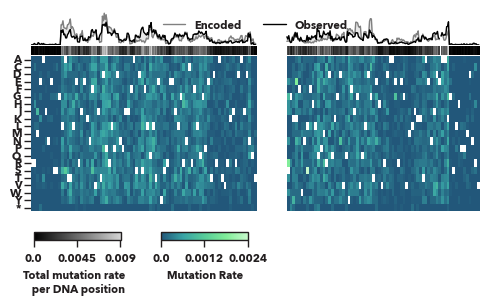

In [6]:
# ====================== LOAD RL8 DATA AND DEFINE REFERENCE SEQUENCES ======================

RL8_mutations = pd.read_csv(f"{repo_root}/final_output/Illumina/DMS_Library_Mutagenesis_10-8/enrichments/AA/RL8_BC1_S1_combined_roiFalse_AA_enrichment_relative.csv", index_col=0)
RL8_DNA_mutations = pd.read_csv(f"{repo_root}/final_output/Illumina/DMS_Library_Mutagenesis_10-8/enrichments/DNA/RL8_BC1_S1_combined_roiFalse_DNA_enrichment_relative.csv", index_col=0)
RL8_encoded_muts = pd.read_csv(f"{repo_root}/final_output/Illumina/RAMPhaGE_Plasmid_Library_NGS/BC3_R1/enrichments/BC3_RL_encoded_mutations.csv", index_col=0).T


RL8_observed_ref = "CGCCGCATGGAAGCGATTAACGAAAGCAGCGGTTTAGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGACCCGCGCCTTCCCGACAATCCAATTATTTTTGCGTCCGATAGCTTCCTGCAATTAACCGAATACAGCCGCGAAGAAATTCTGGGTCGTAATTGTCGCTTCCTTCAGGGGCCAGAGACTGACCGTGCTACGGTACGCAAAATCCGCGACGCAATCGACAATCAAACGGAAGTCACGGTTCAGTTGATTAACTATACGAAGAGCGGAAAAAAATTCTGGAATTTATTTCACTTGCAGCCTATGCGTGACCAGAAGGGCGATGTCCAGTATTTCATTGGCGTTCAGCTTGATGGTACCGAGCATGTTCGCGATGCTGCGGAGCGTGAAGGTGTAATGTTAATTAAAAAGACTGCTGAAAACATTGATGAAGCGGCCAAAGGGAGCCTGCATCCGCCGATGGATAACCGCGTG"

RL8_encoded_ref = "CAGCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTTTAGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGACCCGCGCCTTCCCGACAATCCAATTATTTTTGCGTCCGATAGCTTCCTGCAATTAACCGAATACAGCCGCGAAGAAATTCTGGGTCGTAATTGTCGCTTCCTTCAGGGGCCAGAGACTGACCGTGCTACGGTACGCAAAATCCGCGACGCAATCGACAATCAAACGGAAGTCACGGTTCAGTTGATTAACTATACGAAGAGCGGAAAAAAATTCTGGAATTTATTTCACTTGCAGCCTATGCGTGACCAGAAGGGCGATGTCCAGTATTTCATTGGCGTTCAGCTTGATGGTACCGAGCATGTTCGCGATGCTGCGGAGCGTGAAGGTGTAATGTTAATTAAAAAGACTGCTGAAAACATTGATGAGGCGGCCAAAGGGAGCCTGCATCCGCCGATGGATAACCGCGTGCGCGAAGCGTGC"

cut_left = RL8_encoded_ref.index("CGCCGCATGGAAGCGATTAA")
cut_right = RL8_encoded_ref.index("TGGATAACCGCGTG") + len("TGGATAACCGCGTG")



# ====================== PROCESS RL8 DNA MUTATION DATA ======================

# --- Identify columns (positions) that contain only NaN values ---
# These positions likely have very low sequencing coverage and no reliable data
empty_cols = RL8_DNA_mutations.columns[RL8_DNA_mutations.isna().all()]

# --- Calculate the total relative mutation rate at each position ---
RL8_DNA_muts_prop = RL8_DNA_mutations.sum()

# --- Identify and mask the position with the highest mutation rate ---
# This is likely a silent mutation (e.g. a technical artifact or contamination)
mask_max = RL8_DNA_muts_prop.idxmax()
RL8_DNA_muts_prop[mask_max] = np.nan

# --- Normalize mutation proportions across all valid positions ---
RL8_DNA_muts_prop = RL8_DNA_muts_prop/RL8_DNA_muts_prop.sum()

# --- Sum total mutation counts per position (raw, unnormalized) ---
RL8_DNA_mutations_sum = RL8_DNA_mutations.sum()  

# --- Mask problematic positions again (masking is lost after `.sum()` operation) ---
RL8_DNA_mutations_sum[mask_max] = np.nan
RL8_DNA_mutations_sum[empty_cols] = np.nan
RL8_DNA_muts_prop[mask_max] = np.nan
RL8_DNA_muts_prop[empty_cols] = np.nan

# ====================== PROCESS RL8 ENCODED MUTATIONS ======================


# --- Cut the encoded mutation matrix to match the observed reference frame ---
# Keep only the region between cut_left and cut_right (matching the actual DNA window)
RL8_encoded_muts = RL8_encoded_muts.iloc[:,cut_left:cut_right]

# --- Mask positions with low coverage (same as in the observed DNA mutations) ---
# Identify positions (columns) in the observed data that have only NaN values
empty_cols = RL8_DNA_mutations.columns[RL8_DNA_mutations.isna().all()]
empty_cols = [int(empty_col) for empty_col in empty_cols]

# --- Extract encoded mutation proportions from the first row ---
RL8_encoded_muts_prop = RL8_encoded_muts.iloc[0,:].values

# --- Replace low-coverage positions and the masked maximum with NaN ---
RL8_encoded_muts_prop = pd.DataFrame([RL8_encoded_muts_prop[i] if i not in empty_cols+ [int(mask_max)] else np.nan for i in range(len(RL8_encoded_muts_prop))])


# --- Normalize the encoded mutation profile so that the sum is 1 ---
RL8_encoded_muts_prop = (RL8_encoded_muts_prop/RL8_encoded_muts_prop.sum()).values.flatten()

# ====================== PLOT ENCODED VS OBSERVED MUTATION PROFILES ======================

light_gray = "black" 
dark_gray = "#D3D3D3"

gray_cmap = mcolors.LinearSegmentedColormap.from_list("custom_gray", [light_gray, dark_gray])

fig, axes = plt.subplots(3,1, figsize=(wi1*0.8, hi/3), height_ratios=[0.3, 0.08, 1.3])
plt.subplots_adjust(hspace=0.01)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['left'].set_visible(False)

# --- Plot the encoded mutation profile (gray line) ---
axes[0].plot(RL8_encoded_muts_prop, label = "Encoded", linewidth = 1, color = "grey")

# --- Plot the observed mutation profile (black line) ---
axes[0].plot(RL8_DNA_muts_prop, label = "Observed", linewidth = 1, color = "black")
axes[0].set_xlim(0, len(RL8_encoded_muts.columns))
axes[0].set_ylim(0,0.012)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].legend(frameon = False, ncol=2)
axes[0].fill_between(range(len(RL8_encoded_muts_prop)), RL8_encoded_muts_prop, RL8_DNA_muts_prop, color= "lightgrey", alpha=0.5)

sns.heatmap(pd.DataFrame(RL8_DNA_mutations_sum).T, cmap= gray_cmap, cbar = False, ax = axes[1], xticklabels=False, yticklabels=False)


colors = [
    "#22577A",  # Deep blue
    "#38A3A5",  # Teal
    "#57CC99",  # Medium green
    "#80ED99",  # Bright green
    "#C7F9CC"   # Light pastel green
]

custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_green_blue", colors, N=256)
sns.heatmap(RL8_mutations, cmap= custom_cmap, cbar = False, ax = axes[2],yticklabels=True,xticklabels=False)
axes[2].set_yticklabels(axes[2].get_yticklabels(), rotation=0, fontsize = 8)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=1)
axes[2].tick_params(axis='y', pad=2)  
cbar_ax = fig.add_axes([0.13, -0.0, 0.15, 0.03])


cbar = fig.colorbar(axes[1].collections[0], cax=cbar_ax, orientation="horizontal")

ticks_gray = [0.000, 0.0045, 0.009]
cbar.set_ticks(ticks_gray)
cbar.ax.set_xticklabels([0.000, 0.0045, 0.009]) 

cbar.set_label("Total mutation rate  \n per DNA position")

cbar_ax = fig.add_axes([0.35, -0.0, 0.15, 0.03])

cbar = fig.colorbar(axes[2].collections[0], cax=cbar_ax, orientation = "horizontal")
ticks_colored = [0.0, 0.0012, 0.0024]
cbar.set_ticks(ticks_colored)
cbar.ax.set_xticklabels([0.0, 0.0012, 0.0024]) 
cbar.set_label("Mutation Rate")


# plt.savefig("final_output/DMS_Library_Mutagenesis_10-8/RL8_encoded_vs_observed.pdf", bbox_inches='tight')
# plt.savefig("final_output/DMS_Library_Mutagenesis_10-8/RL8_encoded_vs_observed.png", bbox_inches='tight')

plt.show()


## Figure 5G: Enrichment analysis from a POGO-PANCE/RAMPhaGE evolution campaign using R2-LOV as input.

Mutation rates observed in the left and right linkers of AraC-LOV were quantified by
Nanopore sequencing. The top 10 linkers with the highest variance across all POGO-PANCE
steps are shown at each site as the percentage of total reads, with residues exceeding `10%` shaded
in <span style="color: yellow"><b>yellow</b></span>. The SG variant of the left linker refers to a silent mutation. An expanded explanation
of variant naming conventions are provided in Supplementary Table 6 additional linker library
characterization and phage titer data are shown in Figs. S13 and S14.

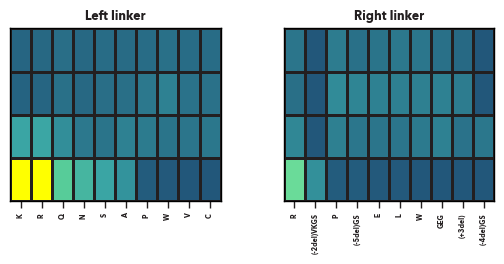

In [7]:
# --- Load linker frequency data (R1 = left linker, R2 = right linker) for multiple barcodes ---

all_left_linkers = pd.DataFrame(dtype = float)
all_right_linkers = pd.DataFrame(dtype = float)
all_linker_vars = []
barcodes = ['R2-LOV_RAMPhaGE_Linker_Mut_D1', "R2-LOV_P2_Neg_D2", 'R2-LOV_P2_Pos_D3', 'R2-LOV_P2_Pos_D\\4']


# --- Load and concatenate linker distributions for each barcode ---
for barcode in barcodes: 
    FigFolder = f"{repo_root}/final_output/Nanopore/Nanopore_P0115/{barcode}/"
    left_linkers = pd.read_csv(f"{FigFolder}/linker_distribution_R1.csv", index_col = 0).T
    left_linkers.index = [str(barcode)]
    all_left_linkers = pd.concat([all_left_linkers, left_linkers], axis = 0)

    right_linkers = pd.read_csv(f"{FigFolder}/linker_distribution_R2.csv", index_col = 0).T
    all_right_linkers = pd.concat([all_right_linkers, right_linkers], axis = 0)

# --- Format indices and normalize to mutation rates (0-1 scale) ---
all_right_linkers.index = [str(bc) for bc in barcodes]
all_left_linkers.index = [str(bc) for bc in barcodes]

all_right_linkers.fillna(0, inplace = True)
all_left_linkers.fillna(0, inplace = True)

all_right_linkers = all_right_linkers/100 #calcuate mutation rates from percentages
all_left_linkers = all_left_linkers/100

# --- Select top N linkers by variance across timepoints ---
n_linkers = 10 

# --- Left linker: calculate variance and select top variants ---
left_vars = all_left_linkers.var()
left_quant = n_linkers/all_left_linkers.shape[1]
left_quantile_threshold = np.percentile(left_vars, 100-left_quant*100)
left_top_indices = [i for i, var in enumerate(left_vars) if var >= left_quantile_threshold]
left_top_vars = all_left_linkers.iloc[:,left_top_indices]

# --- Right linker: calculate variance and select top variants ---
right_vars = all_right_linkers.var()
right_quant = n_linkers/all_right_linkers.shape[1]
right_quantile_threshold = np.percentile(right_vars, 100-right_quant*100)
right_top_indices = [i for i, var in enumerate(right_vars) if var >= right_quantile_threshold]
right_top_vars = all_right_linkers.iloc[:,right_top_indices]

# --- Sort variants by frequency at final timepoint (last barcode) ---
right_top_vars = right_top_vars.sort_values(right_top_vars.last_valid_index(), axis=1,ascending=False)
left_top_vars = left_top_vars.sort_values(left_top_vars.last_valid_index(), axis=1,ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(6.25, 2.25))
fig.subplots_adjust(wspace=0.3)

my_cmap = custom_cmap
my_cmap.set_over('Yellow')

# --- Left linker heatmap ---
sns.heatmap(left_top_vars, cmap=my_cmap, vmax=0.10, ax=ax[0], cbar=False,
            yticklabels=False, xticklabels=True, linecolor="#231F20", linewidths=1)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title("Left linker")
for label in ax[0].get_xticklabels():
    label.set_fontsize(5)
for spine in ax[0].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor('black')

# --- Right linker heatmap ---
sns.heatmap(right_top_vars, cmap=my_cmap, vmax=0.10, ax=ax[1], cbar=False,
            yticklabels=False, xticklabels=True, linecolor="#231F20", linewidths=1)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title("Right linker")
for label in ax[1].get_xticklabels():
    label.set_fontsize(5)
for spine in ax[1].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor('black')

plt.show()

# plt.savefig(f"final_output/Nanopore_P0115/linker_evolution_heatmap{'_'.join(barcodes)}.png", bbox_inches="tight")
# plt.savefig(f"final_output/Nanopore_P0115/linker_evolution_heatmap{'_'.join(barcodes)}.pdf", bbox_inches="tight", dpi=600)

## Figure 5H: Scatter plot comparing variants frequencies after mutagenesis
-------------------
Scatter plot comparing
variants frequencies after mutagenesis (x-axis) versus final positive selection (y-axis) steps.
Variants observed in the left and right linker are indicated. 

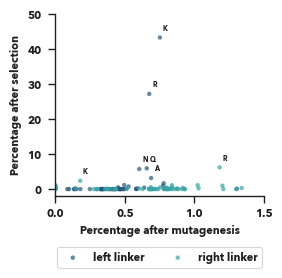

In [8]:
# --- Load linker frequency data (R1 = left linker, R2 = right linker) for two barcodes ---
left_linker_BC1 = pd.read_csv(f"{repo_root}/final_output/Illumina/AraC-R2-LOV_POGO_RAMPhaGE_NGS/R1/enrichments/AA/R36_BC1_S1_R1_AA_linker_distribution.csv", index_col=0).T
right_linker_BC1 = pd.read_csv(f"{repo_root}/final_output/Illumina/AraC-R2-LOV_POGO_RAMPhaGE_NGS/R2/enrichments/AA/R36_BC1_S1_R2_AA_linker_distribution.csv", index_col=0).T

left_linker_BC2 = pd.read_csv(f"{repo_root}/final_output/Illumina/AraC-R2-LOV_POGO_RAMPhaGE_NGS/R1/enrichments/AA/R36_BC2_S1_R1_AA_linker_distribution.csv", index_col=0).T
right_linker_BC2 = pd.read_csv(f"{repo_root}/final_output/Illumina/AraC-R2-LOV_POGO_RAMPhaGE_NGS/R2/enrichments/AA/R36_BC2_S1_R2_AA_linker_distribution.csv", index_col=0).T


# --- Combine right linker variants across both barcodes ---
all_right_linkers_vars = list(set(list(right_linker_BC1.columns) + list(right_linker_BC2.columns)))
all_right_linker_perc = pd.DataFrame(columns = all_right_linkers_vars, index = ["BC1", "BC2"], data = 0, dtype=np.float64)


# --- Fill percentages for each right linker from BC1 and BC2 ---
for linker in all_right_linkers_vars: 
    if linker in right_linker_BC1.columns:
        all_right_linker_perc.loc["BC1", linker] = right_linker_BC1.loc["0", linker]
    if linker in right_linker_BC2.columns:
        all_right_linker_perc.loc["BC2", linker] = right_linker_BC2.loc["0", linker] 


# --- Combine left linker variants across both barcodes ---

all_left_linkers_vars = list(set(list(left_linker_BC1.columns) + list(left_linker_BC2.columns)))
all_left_linker_perc = pd.DataFrame(columns = all_left_linkers_vars, index = ["BC1", "BC2"], data = 0, dtype=np.float64)

# --- Fill percentages for each right linker from BC1 and BC2 ---
for linker in all_left_linkers_vars:
    if linker in left_linker_BC1.columns:
        all_left_linker_perc.loc["BC1", linker] = left_linker_BC1.loc["0",linker]
    if linker in left_linker_BC2.columns:
        all_left_linker_perc.loc["BC2", linker] = left_linker_BC2.loc["0",linker]


# --- Plot scatter plot comparing BC1 vs BC2 linker abundances ---
fig, ax = plt.subplots(figsize = (wi3*1.2, hi/3))
compared_to = "BC2"

# --- Left linker scatter ---
plt.scatter(all_left_linker_perc.loc["BC1",:], all_left_linker_perc.loc[compared_to,:], color = "#22577A", edgecolors='none',alpha=0.7, label = "left linker", s = 10)

# --- Right linker scatter ---
plt.scatter(all_right_linker_perc.loc["BC1",:], all_right_linker_perc.loc[compared_to,:], color = "#38A3A5",edgecolors='none', alpha=0.7, label = "right linker", s = 10)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.tick_params(axis='y', which='major', pad=5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),ncol =2)
plt.ylim(0, 50)
ax.set_ylim(-2, 50)

plt.xlim(0, 1.5)
ax.set_xlim(0, 1.5)
ax.set_xticks(np.arange(0, 1.6, 0.5))
plt.xlabel("Percentage after mutagenesis")
plt.ylabel("Percentage after selection")
for i, (x, y) in enumerate(zip(all_left_linker_perc.loc["BC1", :], all_left_linker_perc.loc[compared_to, :])):
    if y > 2:  
        plt.annotate(all_left_linker_perc.columns[i], (x, y), textcoords="offset points", xytext=(2,5), ha='left', fontsize=5)

for i, (x, y) in enumerate(zip(all_right_linker_perc.loc["BC1", :], all_right_linker_perc.loc[compared_to, :])):
    if y > 2:  
        plt.annotate(all_right_linker_perc.columns[i], (x, y), textcoords="offset points", xytext=(2,5), ha='left', fontsize=5)
plt.show()


## Figure 5I: AlphaFold3-predicted structure of WT AraC-LOV2 and comparison to that of R2-LOV2
---------------------
AlphaFold3-predicted structure of
WT AraC-LOV2 and comparison to that of R2-LOV2 in which the left SG linker is replaced
with a single lysine. AraC, AsLOV2, and linker regions are colored pink, blue, and green,
respectively.

![Alt Text](figure_illustrations/Figure_5I.png)

## Figure 5J: Functional validation of enriched R2-LOV linker variants using the RFP reporter assay.
-------------
Samples induced with 400μM IPTG were incubated in the dark or illuminated
with blue light. RFP fluorescence normalized to OD600 was measured in a plate reader. Data
shown as mean ± S.E.M. from n = 3 biological replicates. Figure created with GraphPad Prism.

![Alt Text](figure_illustrations/Figure_5J.png)